In [13]:
import sys
sys.path.append('/Users/lindsaybassman/Documents/LBL/ArQTiC')
from arqtic.simulation_generator import Simulation_Generator
import matplotlib.pyplot as plt
import numpy as np
import qiskit as qk
from qiskit import Aer, IBMQ, execute
import random
import qsearch
import scipy.linalg as la

In [25]:
#create simulation object
sim_obj = Simulation_Generator("QITE_input.txt")
N = sim_obj.num_spins

In [26]:
print(sim_obj.beta)
print(sim_obj.delta_beta)

5.0
0.5


In [27]:
#connect to IBM
#if this is your first run enter your API key
#sim_obj.connect_IBM(api_key="c2629e2a2595c888d4b84e5fc15e8756ccf2e3af6f5eb7525beaee93ce017ecb7581cf3c74c8de44a88b2a554ecc7d82be52ac9e358430de782be155e4586195")

In [28]:
qasm_sim = Aer.get_backend('qasm_simulator')
unitary_sim = Aer.get_backend('unitary_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

In [29]:
#generate circuits
sim_obj.generate_programs()

initial_spins:  ['1', '1', '0']
init psi is: [0 0 0 0 0 0 1 0]
Creating IBM quantum circuit objects...
IBM quantum circuit objects created


In [30]:
#get results
energies = sim_obj.qite_energies

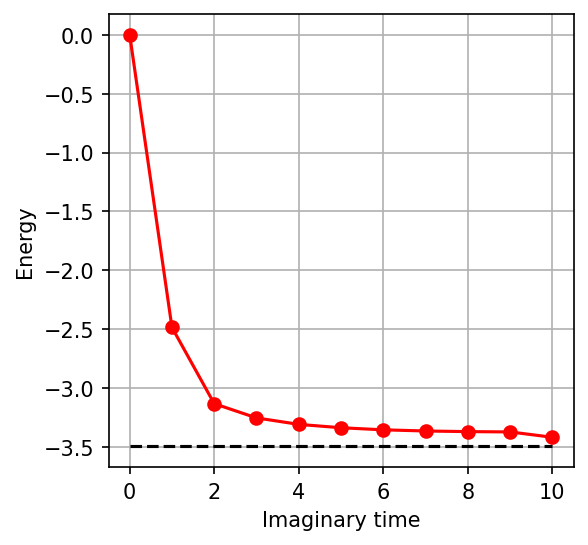

In [31]:
plt.figure(figsize=[4,4], dpi=150)
#plt.plot(np.arange(0,num_beta+1)*dbeta,E,'-ro',label='QITE')
plt.plot(energies,'-ro')
#plt.axhline(y=w[0], color='k',linestyle='--',label="Ground state")
#plt.title("QITE")
plt.xlabel("Imaginary time")
plt.ylabel("Energy")
#plt.hlines(-2.2335146376196326, 0, 100, color="black", linestyles='dashed') #2qubits Jz=1, mu_x=1, beta=5
#plt.hlines(-1.8353800357595826, 0, 100, color="black", linestyles='dashed') #2qubits Jz=1, mu_x=1, beta=1
#plt.hlines(-2.2360626825057124, 0, 10, color="black", linestyles='dashed') #2qubits Jz=1, mu_x=1, beta=10
plt.hlines(-3.493837927970963, 0, 10, color="black", linestyles='dashed') #3qubits Jz=1, mu_x=1, beta=10

plt.grid()
#plt.xlim(0,10)

#plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()
#plt.savefig('QITE_GSenergy.png')

In [32]:
print(energies)

[1.1102230246251565e-16, -2.4836119076725334, -3.130506750476857, -3.251369428593663, -3.3062115558307608, -3.3347873866988764, -3.3524235630923114, -3.362380401545672, -3.3676089836123593, -3.3702662138130166, -3.4157421086398196]


In [33]:
ibm_qite_circ = sim_obj.ibm_circuits_list[0]
print(ibm_qite_circ)
unitary_sim = Aer.get_backend('unitary_simulator')
job = execute(ibm_qite_circ, unitary_sim)
result = job.result()
ibm_qite_unitary = result.get_unitary(ibm_qite_circ, decimals=16)
print(ibm_qite_unitary)


                      ┌──────────┐            ┌──────────┐            »
q_0: ─────────────────┤0         ├────────────┤0         ├────────────»
     ┌───┐┌──────────┐│  unitary │┌──────────┐│  unitary │┌──────────┐»
q_1: ┤ X ├┤0         ├┤1         ├┤0         ├┤1         ├┤0         ├»
     ├───┤│  unitary │└──────────┘│  unitary │└──────────┘│  unitary │»
q_2: ┤ X ├┤1         ├────────────┤1         ├────────────┤1         ├»
     └───┘└──────────┘            └──────────┘            └──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐            ┌──────────┐            ┌──────────┐            »
«q_0: ┤0         ├────────────┤0         ├────────────┤0         ├────────────»
«     │  unitary │┌──────────┐│  unitary │┌──────────┐│  unitary │┌──────────┐»
«q_1: ┤1         ├┤0         ├┤1         ├┤0         ├┤1         ├┤0         ├»
«     └──────────┘│  unitary │└─

In [11]:
prog_qite_unitary = np.eye(2**N)
idx = 0
for gate in sim_obj.programs_list[0].gates:
    mat = gate.matrix()
    if (idx%2 == 0):
        mat = np.kron(mat, np.eye(2))
    else:
        mat = np.kron(np.eye(2), mat)
    prog_qite_unitary = np.matmul(mat, prog_qite_unitary)
    idx += 1
print(prog_qite_unitary)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 16)

In [32]:
prog_qite_unitary = np.eye(2**N)
for gate in sim_obj.programs_list[0].gates:
    prog_qite_unitary = np.matmul(gate.matrix(), prog_qite_unitary)
print(prog_qite_unitary)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 2)

In [14]:
temp = np.matmul(np.conj(np.transpose(ibm_qite_unitary)), prog_qite_unitary)
print(1 - ( np.abs( np.trace( temp ) ) / ( 2 ** N ) ))

0.0


In [13]:
ibm_qite_unitary_rev = qsearch.utils.endian_reverse(ibm_qite_unitary, d=8)

In [14]:
print(ibm_qite_unitary_rev)
print(ibm_qite_unitary)

[[ 0.19775874+0.j  0.53158446+0.j  0.39686022+0.j  0.30108646+0.j
  -0.09282613+0.j  0.33518707+0.j  0.54649245+0.j  0.10265128+0.j]
 [-0.20545028+0.j -0.36104906+0.j  0.26519311+0.j  0.59289031+0.j
   0.53937293+0.j -0.21353915+0.j  0.08200522+0.j  0.24968075+0.j]
 [-0.57605533+0.j -0.3970227 +0.j  0.24734231+0.j  0.09878768+0.j
  -0.45308401+0.j  0.34910483+0.j  0.12775661+0.j -0.31002411+0.j]
 [ 0.29065455+0.j -0.32183132+0.j  0.59488572+0.j -0.37962103+0.j
  -0.08760516+0.j  0.18547338+0.j -0.23138735+0.j  0.46725608+0.j]
 [-0.291593  +0.j  0.47612007+0.j  0.17162451+0.j  0.28196325+0.j
  -0.06610497+0.j  0.12497351+0.j -0.74242341+0.j  0.09024518+0.j]
 [ 0.57958348+0.j -0.28434893+0.j -0.16002785+0.j  0.56573768+0.j
  -0.43650727+0.j  0.02022161+0.j -0.19979855+0.j -0.08181485+0.j]
 [ 0.20501657+0.j -0.1176212 +0.j -0.09324806+0.j -0.01673479+0.j
   0.53323615+0.j  0.70444943+0.j -0.1565974 +0.j -0.36061844+0.j]
 [-0.19846049+0.j -0.06693075+0.j -0.54161633+0.j  0.06414397+0.j
  -

In [34]:
#Pauli matrices
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sz = np.array([[1, 0], [0, -1]])
Jz = sim_obj.Jz
mu_x = sim_obj.h_ext
hinit = np.zeros((2**N, 2**N), dtype=np.complex128)
#2qubits
#hinit += Jz*np.kron(sz,sz)
#hinit += mu_x*np.kron(sx,np.eye(2))
#hinit += mu_x*np.kron(np.eye(2),sx)
#3qubits
hinit += Jz*np.kron(np.eye(2),np.kron(sz,sz))
hinit += Jz*np.kron(np.kron(sz,sz),np.eye(2))
hinit += mu_x*np.kron(sx,np.kron(np.eye(2),np.eye(2)))
hinit += mu_x*np.kron(np.eye(2),np.kron(sx,np.eye(2)))
hinit += mu_x*np.kron(np.eye(2),np.kron(np.eye(2),sx))

In [76]:
psi = [1,0,0,0,0,0,0,0]

In [77]:
ibm_qite_psi = np.dot(ibm_qite_unitary, psi)
print(ibm_qite_psi)

[-0.19568555-0.00295871j  0.30919358+0.00453222j  0.45944949+0.0074412j
 -0.27460899-0.00425028j  0.31309865+0.00453923j -0.59935802-0.00838722j
 -0.27854739-0.00428728j  0.21102461+0.00310976j]


In [78]:
obs = np.dot(np.transpose(np.conj(ibm_qite_psi)), np.dot(hinit, ibm_qite_psi))
print(obs)

(-3.4840405816184434+0j)


In [35]:
result = qk.execute(ibm_qite_circ, state_vector_sim).result()
statevector = result.get_statevector(ibm_qite_circ)
eng = np.real(np.dot(np.conj(statevector).transpose(), np.dot(hinit, statevector)))
print(eng)

-3.4157421086398188


In [35]:
qite_psi = np.dot(prog_qite_unitary, psi)
print(qite_psi)
#print(np.linalg.norm(psi))

[1. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
obs = np.dot(np.transpose(np.conj(qite_psi)), np.dot(hinit, qite_psi))
print(obs)

(-3.481683829310013+0j)
